##**INSTALAÇAO**⚡
> não precisa fazer a instalação das bibliotecas matplotlib, tensorflow e keras, pois elas são bibliotecas padrões do ambiente do Colab!
---

In [ ]:
!pip install scikeras
!pip install scikit-learn==1.5.2

In [ ]:
import sklearn
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

##**Utilização do MNIST** ➕
> Utilizar o dataset do **MNIST** é muito simples. Utilizando o método **load_data** do módulo mnist, recebemos um par de tuplas compostas por 4 variáveis, sendo a primeira tupla composta pelos dados de treinos e seus rótulos, respectivamente $(x\_train, y\_train)$\;

> E a segunda pelos dados de teste e seus rótulos $(x\_test, y\_test)$\.

---

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

In [ ]:
X.shape

(70000, 28, 28)

In [ ]:
y.shape

(70000,)

##**DIVISÃO TREINO-TESTE-VALIDAÇÃO** 🥑

> O processo de divisão é muito importante, pois faz a separação dos dados utilizados para cada processo do treinamento, para não comprometer o aprendizado (Data Leakage).
---

In [ ]:
train_ratio = 0.6; validation_ratio = 0.2; test_ratio = 0.2

# Retorna subconjuntos aleatórios de treino e conjunto temporário de (validação + teste), no formato ArrayNP
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=(0.4), random_state = 42)

# Faz a separação definitica entre validação e teste
x_val, x_test, y_val, y_test   = train_test_split(x_val, y_val, test_size=(test_ratio/(validation_ratio+test_ratio)))

In [ ]:
x_train.shape

(42000, 28, 28)

In [ ]:
x_test.shape

(14000, 28, 28)

In [ ]:
x_val.shape

(14000, 28, 28)

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,  10,  98, 105, 171, 199, 194, 120,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  20,  76, 152, 254, 254, 254, 254, 181,  58,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   6,  83, 207, 247, 207, 179, 113,  71,  19,   1,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  71, 247, 118,  40,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        138, 164,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 190,
        220,  32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 254,
         93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 173, 223,
          6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 209, 224,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 180, 254,
        217,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 217,
        254, 217,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        211, 254, 223,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  53,   0,   0,  15,  48,  90, 142,
        251, 254, 254,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 226, 208, 208, 222, 254, 254, 254,
        254, 252, 130,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 100, 214, 255, 254, 254, 254, 254,
        204, 116,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5,  48, 104,  33,  62,   9,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

##**LEITURA DAS IMAGENS** 🎦

> Cada imagem é um array com 28 por 28 elementos, e cada um deles possui um número associado a uma cor **(0 é o mais branco, escurecendo até 255)**

---

In [ ]:
x_train, x_test, x_val = x_train / 255, x_test / 255, x_val / 255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

5


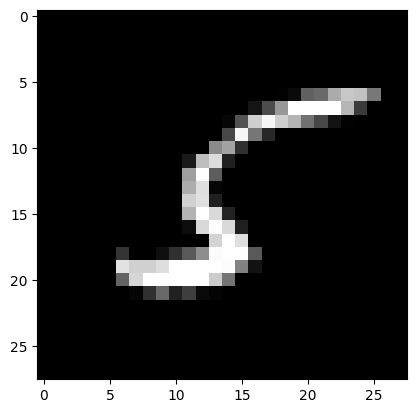

In [ ]:
plt.imshow(x_train[0], cmap=plt.cm.gray)
print(y_train[0])

1


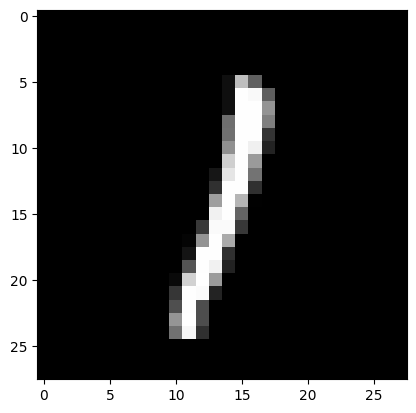

In [ ]:
plt.imshow(x_train[4], cmap=plt.cm.gray)
print(y_train[4])

In [ ]:
y_train[4]

np.uint8(1)

##**FLATTEN** 🍼

> O Flatten é o processo de pegar todos os elementos de um array de dimensões mais altas (por exemplo, uma matriz) e organizá-los em uma única linha de dados, essencial pois as camadas (Densas), que são usadas para realizar a classificação (a decisão final), só aceitam vetores unidimensionais como entrada.

> _doc oficial:_ https://keras.io/api/layers/reshaping_layers/flatten/
---

In [ ]:
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat  = x_test.reshape(len(x_test), 28*28)
x_val_flat   = x_val.reshape(len(x_val), 28*28)

In [ ]:
x_train_flat.shape

(42000, 784)

In [ ]:
x_test_flat.shape

(14000, 784)

In [ ]:
x_val_flat.shape

(14000, 784)

In [ ]:
x_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##**CRIANDO O MODELO** ✨

> Abaixo um exemplo da criação de um modelo de classificação por camadas densamente conectadas.

> _doc oficial:_ https://keras.io/api/layers/core_layers/dense/
---

In [ ]:
"""
  Recebe como parâmetros a quantidade de camadas ocultas, a função de ativação e a
  porcentagem de neuronios que serão desativados aleatoriamente (evitando overfitting)
"""
def criar_modelo(layers, activation, dropout):

  modelo = Sequential() # Aqui as camadas são postas sequencialmente.

  for i, neurons in enumerate(layers):
    if i==0:
      # Define as caracteristicas da primeira camada oculta, cujo vetor de
      # entrada é de 784 (28x28), defido ao Flatten aplicado.
      modelo.add(Dense(neurons, input_shape=(784,), activation=activation))
      modelo.add(Dropout(dropout))

    else:
      # Camadas ocultas seguintes:
      modelo.add(Dense(neurons, activation=activation))
      modelo.add(Dropout(dropout))

  # Camada de saida, com 10 neurônios (já que é o nosso total de classes)
  modelo.add(Dense(10, activation='softmax'))

  # A compilação é obrigatória, responsável por configurar a função de perda,
  # método de otimização e de avaliação.
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return modelo

##**TESTAGEM DE HIPERPARÂMETROS** 👾

> Para sabermos a melhor configuração do número de hiperparâmetros a serem utilizados, podemos aplicar um método de verificação exaustivo, a exemplo do GridSearchCV do scikit-learn.

> _doc oficial:_ https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
---

In [ ]:
# O KerasClassifier é preciso para podermos avaliar as métricas da nossa rede Keras utilizando funções do scikit-learnig
modelo = KerasClassifier(model=criar_modelo, layers=[128, 128], activation='relu', dropout=0.1, epochs=20)

# define quais valores discretos cada hiperparametro (camada, f_ativação e dropout) empregados para a testagem da melhor
# combinação
grid_params = {
    "layers": [[128,128]],
    #"layers": [[256,256], [256,128] , [128,128], [128,64], [256,256,128], [256,128,64], [128,128,64], [128,64,64]],
    "activation": ['sigmoid', 'relu'],
    "dropout":[0.1],
    #"dropout":[0.1, 0.2, 0.3, 0.4]
}

# Responsável por treinar o modelo com cada uma das combinações acima, guardando o melhor.
grid_search = GridSearchCV(estimator=modelo, param_grid=grid_params, cv=4, scoring='accuracy')

# Utilizamos aqui um treinamento sobre a validação, para ser mais rápido.
grid_result = grid_search.fit(x_val_flat, y_val)
best_model  = grid_search.best_estimator_

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4888 - loss: 1.6821
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8802 - loss: 0.4644
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9075 - loss: 0.3275
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9269 - loss: 0.2643
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9348 - loss: 0.2225
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9389 - loss: 0.2069
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9470 - loss: 0.1814
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9583 - loss: 0.1542
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9539 - loss: 0.1444
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9582 - loss: 0.1305
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1052
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4954 - loss: 1.6632
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.4705
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9048 - loss: 0.3456
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2782
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.2320
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9400 - loss: 0.2054
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9460 - loss: 0.1800
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9463 - loss: 0.1782
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9524 - loss: 0.1550
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9613 - loss: 0.1365
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9658 - loss: 0.1126
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4804 - loss: 1.7080
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8827 - loss: 0.4696
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9079 - loss: 0.3339
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9223 - loss: 0.2692
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9295 - loss: 0.2306
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9418 - loss: 0.1994
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9425 - loss: 0.1798
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.1688
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9607 - loss: 0.1367
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9610 - loss: 0.1266
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.1208
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4712 - loss: 1.6809
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8796 - loss: 0.4690
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9085 - loss: 0.3329
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9199 - loss: 0.2786
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9309 - loss: 0.2356
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9415 - loss: 0.2047
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9488 - loss: 0.1815
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1697
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9555 - loss: 0.1487
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9617 - loss: 0.1360
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9646 - loss: 0.1189
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7283 - loss: 0.9122
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9190 - loss: 0.2589
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9494 - loss: 0.1726
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1235
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1076
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0688
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9774 - loss: 0.0621
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0515
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0464
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9917 - loss: 0.0307
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0306
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7125 - loss: 0.9510
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9182 - loss: 0.2706
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.1794
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9592 - loss: 0.1295
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9687 - loss: 0.1001
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9705 - loss: 0.0945
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0636
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0456
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0386
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0356
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9909 - loss: 0.0318
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7285 - loss: 0.9050
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9282 - loss: 0.2440
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9466 - loss: 0.1719
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9579 - loss: 0.1297
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9715 - loss: 0.0960
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0839
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0612
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9872 - loss: 0.0436
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0446
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0354
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9900 - loss: 0.0310
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7266 - loss: 0.9305
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9319 - loss: 0.2418
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9508 - loss: 0.1692
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1175
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0955
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0725
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0680
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9840 - loss: 0.0495
Epoch 9/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0591
Epoch 10/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0313
Epoch 11/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0340
Epoch 12/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7577 - loss: 0.7970
Epoch 2/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9327 - loss: 0.2227
Epoch 3/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9521 - loss: 0.1559
Epoch 4/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1139
Epoch 5/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0802
Epoch 6/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0712
Epoch 7/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9805 - loss: 0.0596
Epoch 8/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9822 - loss: 0.0502
Epoch 9/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9848 - loss: 0.0433
Epoch 10/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0361
Epoch 11/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0354
Epoch 12/20
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy

In [ ]:
# Melhores hiperparametros encontrados:
best_params = grid_result.best_params_

print("Melhor ativação:", best_params['activation'])
print("Melhor dropout:", best_params['dropout'])
print("Melhor qtd de camadas ocultas e neuronios:", best_params['layers'])

Melhor ativação: relu
Melhor dropout: 0.1
Melhor qtd de camadas ocultas e neuronios: [128, 128]


In [ ]:
modelo = criar_modelo(best_params['layers'], best_params['activation'], best_params['dropout'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = modelo.fit(x_train_flat, y_train, epochs=10, validation_data=(x_val_flat, y_val))

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8413 - loss: 0.5203 - val_accuracy: 0.9555 - val_loss: 0.1469
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9583 - loss: 0.1390 - val_accuracy: 0.9692 - val_loss: 0.1014
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9689 - loss: 0.1026 - val_accuracy: 0.9686 - val_loss: 0.1017
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9759 - loss: 0.0759 - val_accuracy: 0.9738 - val_loss: 0.0889
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9790 - loss: 0.0662 - val_accuracy: 0.9743 - val_loss: 0.0872
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9834 - loss: 0.0520 - val_accuracy: 0.9722 - val_loss: 0.0956
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9857 - loss: 0.0469 - val_accuracy: 0.9743 - val_loss: 0.0925
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9873 - loss: 0.0373 - 

##**MEDIDAS DE DESEMPENHO** 📈

> Como saber se nosso modelo é bom? Para isso fazemos a análise das medidas de desempenho, como precisão, recall e f-score.

> _doc oficial:_ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
---

In [ ]:
# Retorna uma lista com as medidas de desempenho durante a validação
modelo.evaluate(x_val_flat, y_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9764 - loss: 0.0890


[0.0894530639052391, 0.975428581237793]

In [ ]:
# Retorna uma lista com as medidas de desempenho durante o teste
modelo.evaluate(x_test_flat, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0951


[0.09416107833385468, 0.975928544998169]

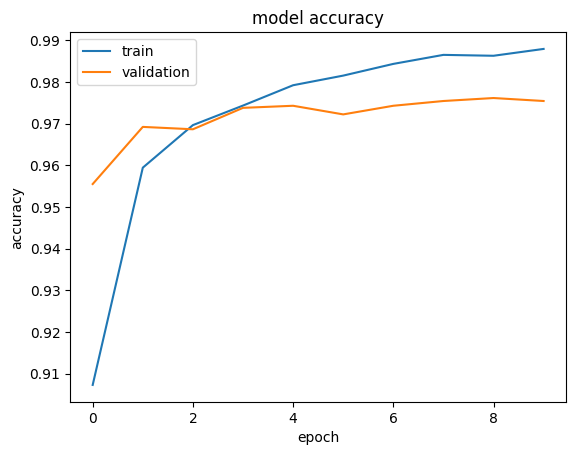

In [ ]:
# Evolução da acuracia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

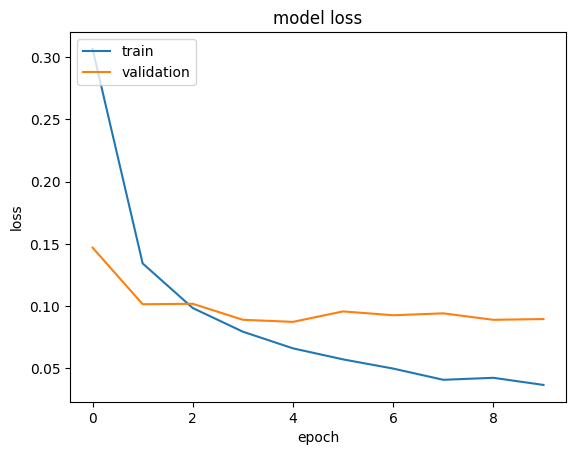

In [ ]:
# Evolução da perda (redução do erro)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [ ]:
# Faz uma previsão com um dado do conjunto de teste
predicoes = modelo.predict(x_test_flat)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Mostra a previsão de maior probabilidade
predicoes_labels = [np.argmax(i) for i in predicoes]

Numero previsto: 0

Numero real:


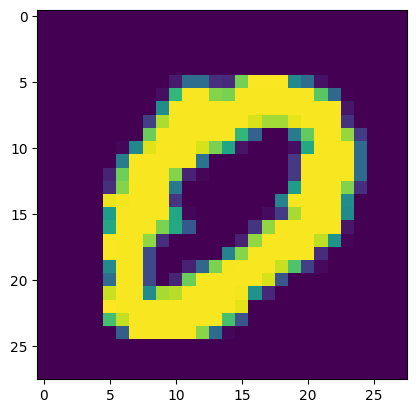

In [ ]:
print("Numero previsto:", predicoes_labels[3])

print("\nNumero real:")
plt.imshow(x_test[3]);

In [ ]:
# Mostra a porcentagem de cada uma das saidas que representam nossas 10 classes
predicoes[0]

array([4.9864379e-09, 1.7830338e-04, 9.9838841e-01, 1.3755505e-03,
       4.9305393e-11, 4.6523706e-08, 2.6905781e-08, 5.1527142e-05,
       6.2410454e-06, 3.5165975e-09], dtype=float32)

In [ ]:
# Mostra a classe de resultado
predicoes_labels[0]

np.int64(2)

In [ ]:
# Mostra as metricas de desempenho durante o teste.
from sklearn.metrics import f1_score, classification_report
print(classification_report(y_test, predicoes_labels, digits=3))

              precision    recall  f1-score   support

           0      0.984     0.985     0.984      1395
           1      0.983     0.993     0.988      1574
           2      0.975     0.975     0.975      1422
           3      0.987     0.953     0.969      1391
           4      0.990     0.970     0.980      1311
           5      0.952     0.984     0.968      1269
           6      0.987     0.985     0.986      1388
           7      0.967     0.984     0.976      1522
           8      0.973     0.959     0.966      1342
           9      0.962     0.968     0.965      1386

    accuracy                          0.976     14000
   macro avg      0.976     0.976     0.976     14000
weighted avg      0.976     0.976     0.976     14000



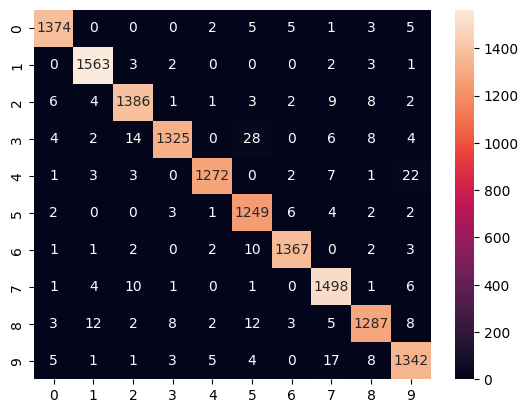

In [ ]:
import seaborn as sn

# Matriz de confusão:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=predicoes_labels)
sn.heatmap(confusion_matrix, annot=True, fmt='d');